<a href="https://colab.research.google.com/github/MaximeGloesener/HandsOnAI-Challenge1/blob/master/Challenge1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Hardware Informations (GPU)**

In [1]:
# Check GPU
!/opt/bin/nvidia-smi
!rm -rf sample_data

Mon Oct 17 12:17:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Installing wandb for MLOPS
!pip install wandb
# Login to W&B
!wandb login

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.5 MB/s 
     |████████████████████████████████| 162 kB 65.7 MB/s 
     |████████████████████████████████| 182 kB 63.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 162 kB 68.4 MB/s 
     |████████████████████████████████| 158 kB 67.9 MB/s 
     |████████████████████████████████| 157 kB 72.5 MB/s 
     |████████████████████████████████| 157 kB 66.3 MB/s 
     |████████████████████████████████| 157 kB 71.0 MB/s 
     |████████████████████████████████| 157 kB 46.7 MB/s 
     |████████████████████████████████| 157 kB 53.4 MB/s 
     |████████████████████████████████| 157 kB 54.9 MB/s 
     |████████████████████████████████| 157 kB 57.4 MB/s 
     |████████████████████████████████| 156 kB 52.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=6

# **2. Importation of librairies**

In [3]:
# General Dependencies
from IPython.display import Image, HTML, display
from matplotlib import pyplot as plt
import numpy as np 
import os
import cv2
import csv
import math
import argparse
import matplotlib
import imghdr
import pickle as pkl
import datetime
from cycler import cycler
from PIL import Image, ImageEnhance
from google.colab import files

# For Deep Learning
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Model, load_model
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input #224*224
from keras.applications.xception import Xception, preprocess_input, decode_predictions #299*299
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions #224*224
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

print("Tensorflow version: "+tf.__version__)
print("Keras version: " + tf.keras.__version__)

# For MLOps
import wandb
from wandb.keras import WandbCallback

Tensorflow version: 2.9.2
Keras version: 2.9.0


#**3. Download of training datasets "FIRE_DATABASE_X"**

In [4]:
bases_path_after="bases"
if os.path.exists(bases_path_after) == False:
    os.makedirs(bases_path_after)

In [5]:
if not os.path.exists('bases/FIRE_DATABASE_1'):
  !rm -rf FIRE_DATABASE_1.tar
  !rm -rf sample_data
  !wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_1.tar
  !tar xf FIRE_DATABASE_1.tar -C 'bases' --one-top-level
  !rm FIRE_DATABASE_1.tar

--2022-10-17 12:18:01--  https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_1.tar
Resolving cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)... 193.190.209.220
Connecting to cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 466772992 (445M) [application/octet-stream]
Saving to: ‘FIRE_DATABASE_1.tar’

FIRE_DATABASE_1.tar 100%[===================>] 445.15M  77.1MB/s    in 5.8s    

2022-10-17 12:18:07 (76.5 MB/s) - ‘FIRE_DATABASE_1.tar’ saved [466772992/466772992]



In [6]:
if not os.path.exists('bases/FIRE_DATABASE_2'):
  !rm -rf FIRE_DATABASE_2.tar
  !rm -rf sample_data
  !wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_2.tar
  !tar xf FIRE_DATABASE_2.tar -C 'bases' --one-top-level
  !rm FIRE_DATABASE_2.tar

--2022-10-17 12:18:09--  https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_2.tar
Resolving cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)... 193.190.209.220
Connecting to cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1163223040 (1.1G) [application/octet-stream]
Saving to: ‘FIRE_DATABASE_2.tar’

FIRE_DATABASE_2.tar 100%[===================>]   1.08G  71.4MB/s    in 18s     

2022-10-17 12:18:27 (61.9 MB/s) - ‘FIRE_DATABASE_2.tar’ saved [1163223040/1163223040]



In [7]:
  if not os.path.exists('bases/FIRE_DATABASE_3'):
    !rm -rf FIRE_DATABASE_3.tar
    !rm -rf sample_data
    !wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_3.tar
    !tar xf FIRE_DATABASE_3.tar -C 'bases' --one-top-level
    !rm FIRE_DATABASE_3.tar

--2022-10-17 12:18:32--  https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_3.tar
Resolving cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)... 193.190.209.220
Connecting to cluster.ig.umons.ac.be (cluster.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 471111680 (449M) [application/octet-stream]
Saving to: ‘FIRE_DATABASE_3.tar’

FIRE_DATABASE_3.tar 100%[===================>] 449.29M  76.9MB/s    in 5.9s    

2022-10-17 12:18:38 (76.2 MB/s) - ‘FIRE_DATABASE_3.tar’ saved [471111680/471111680]



#**4. Cretate the labels file "classes.txt"**

In [8]:
!printf '%s\n' 'fire' 'no_fire' 'start_fire'> classes.txt

#**5. Training parameters and selectioon of Pretrained model**

In [9]:
configs = dict(
      nb_classes = 3,
      batch_size = 8, 
      input_dim = 224,
      epochs = 5,
      dataset_name = 'FIRE_DATABASE_1',
      classifier = "Xception",
      pretrain_weights = 'imagenet',
      init_learning_rate = 0.001,
      lr_decay_rate = 0.1,
      optimizer = 'adam',
      loss_fn = 'categorical_crossentropy',
      metrics = ['acc'],
      earlystopping_patience = 5
    )
seed=42
# Fixer le seed pour rendre les tests déterministes
tf.keras.utils.set_random_seed(seed)
classes_path = "classes.txt"
csv_path = 'result.csv'
dataset_path = "bases"
result_path = 'results/' + configs['classifier']
dataset_path = os.path.join('bases/', configs['dataset_name'])
result_path='results/'
log_path='logs'
result_path = 'results/' + configs['classifier']

# **6. Get the number of classes**

In [10]:
# Get the class names
with open(classes_path, 'r') as f:
    classes = f.readlines()
    classes = list(map(lambda x: x.strip(), classes))
num_classes = len(classes)

# **8. Selection and configuration of the training dataset**

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
	dataset_path,                     # Path of the dataset
	validation_split=0.2,             # Data division : validation (20%), train (80%)
	subset="training",                # Selection of training data
	seed=42,                          # Initialization of random generator (for permutations)
	image_size=(224,224),    					# Input size of images
	batch_size=configs['batch_size'], # Batch_size
  label_mode="categorical"     			# Conversion to One-Hot format
)

Found 1500 files belonging to 3 classes.
Using 1200 files for training.


#**9. Selection and configuration of the validation dataset**

In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
	dataset_path,                     # Path of the dataset
	validation_split=0.2,             # Data division : validation (20%), train (80%)
	subset="validation",              # Selection of validation data
	seed=42,                          # Initialization of random generator (for permutations)
	image_size=(224,224),    					# Input size of images
	batch_size=configs['batch_size'], # Batch_size
  label_mode="categorical"     			# Conversion to One-Hot format
)

Found 1500 files belonging to 3 classes.
Using 300 files for validation.


In [13]:
def lr_scheduler(epoch, lr):
    # log the current learning rate onto W&B
    if wandb.run is None:
        raise wandb.Error("You must call wandb.init() before WandbCallback()")

    wandb.log({'learning_rate': lr}, commit=False)
    
    if epoch < 7:
        return lr
    else:
        return lr * tf.math.exp(-configs['lr_decay_rate'])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [14]:
earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=configs['earlystopping_patience'], verbose=0, mode='auto',
    restore_best_weights=True
)

# **10. Download the pretrained model**

In [15]:
def get_model(input_shape: tuple=(224,224,3),
              num_classes: int=3,
              output_activation: str='softmax',
              dropout_rate: float=0.4):
  
  base_model = Xception(include_top = False, weights ='imagenet',input_shape = input_shape)
  model = base_model.output
  model = Flatten()(model)
  model = Dense(128,activation='relu')(model)
  model = Dropout(0.8)(model)
  model = Dense(64,activation = 'relu')(model)
  model = Dropout(0.4)(model)
  predictions = Dense(num_classes, activation = output_activation)(model)
  model = Model(inputs=base_model.inputs, outputs=predictions)
  return model

# **13. Model training**

In [16]:
def train(config: dict, callbacks: list, verbose: int=0):
  tf.keras.backend.clear_session()
  model=get_model()
  # pour permettre le ré-entrainement des couches
  for layer in model.layers:
      layer.trainable = True
  # recompiler le modèle
  opt = keras.optimizers.SGD(learning_rate=config.init_learning_rate)
  opt2 = keras.optimizers.Adam(learning_rate=config.init_learning_rate)
  opt3 = keras.optimizers.RMSprop(learning_rate=config.init_learning_rate)

  model.compile(loss=config.loss_fn,optimizer=opt2,metrics=config.metrics)  


  # Création du dossier pour sauvegrader le model
  if os.path.exists(result_path) == False:
      os.makedirs(result_path)

  keras_callback = [EarlyStopping(monitor='val_loss',patience = config['earlystopping_patience'], mode='auto',restore_best_weights=True)]
  history=model.fit(
      train_ds,
      steps_per_epoch=math.ceil(len(train_ds)),
      epochs=config.epochs,
      validation_data=val_ds,
      validation_steps=math.ceil(len(val_ds)),
      callbacks = [WandbCallback()]
  )
  return model

In [17]:
# Initialize the W&B run
run = wandb.init(project="classifieur_feux", entity="polytechmaxtyemur", config=configs, job_type='train')
config = wandb.config

# Define WandbCallback for experiment tracking
wandb_callback = WandbCallback(monitor='accuracy',
                               log_weights=True,
                               log_evaluation=True,
                               validation_steps=5)

# callbacks
callbacks = [earlystopper, wandb_callback, lr_callback]

# Train
model = train(config, callbacks=callbacks, verbose=1)

# Evaluate the trained model
loss, acc = model.evaluate(val_ds)
wandb.log({'evaluate/accuracy': acc})

# Close the W&B run.
wandb.finish()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: maxglo (polytechmaxtyemur). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


83683744/83683744 [==============================] - 2s 0us/step
Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 0.7091 - acc: 0.7683

wandb: Adding directory to artifact (/content/wandb/run-20221017_121846-3hg7ctfn/files/model-best)... Done. 2.5s


150/150 [==============================] - 73s 367ms/step - loss: 0.7091 - acc: 0.7683 - val_loss: 89.2853 - val_acc: 0.6900
Epoch 2/5
150/150 [==============================] - 31s 199ms/step - loss: 0.6844 - acc: 0.7533 - val_loss: 285.2457 - val_acc: 0.7100
Epoch 3/5
150/150 [==============================] - ETA: 0s - loss: 0.4770 - acc: 0.8458

wandb: Adding directory to artifact (/content/wandb/run-20221017_121846-3hg7ctfn/files/model-best)... Done. 2.6s


150/150 [==============================] - 53s 350ms/step - loss: 0.4770 - acc: 0.8458 - val_loss: 0.6914 - val_acc: 0.8500
Epoch 4/5
150/150 [==============================] - 33s 213ms/step - loss: 0.3830 - acc: 0.8683 - val_loss: 1.1423 - val_acc: 0.8900
Epoch 5/5
150/150 [==============================] - ETA: 0s - loss: 0.3101 - acc: 0.8917

wandb: Adding directory to artifact (/content/wandb/run-20221017_121846-3hg7ctfn/files/model-best)... Done. 2.8s


38/38 [==============================] - 6s 104ms/step - loss: 0.3046 - acc: 0.9000


acc,▂▁▆▇█
epoch,▁▃▅▆█
evaluate/accuracy,▁
loss,██▄▂▁
val_acc,▁▂▆██
val_loss,▃█▁▁▁
acc,0.89167
best_epoch,4
best_val_loss,0.30461
epoch,4
evaluate/accuracy,0.9


#**14. Save your model**


In [18]:
"""model.save('test.h5')"""

#**15. Visualization of training/validation curves**

#**16. Test the model with a test image : (TO COMPLETE)**

In [ ]:
files.upload();

In [20]:
filename = "https://www.google.com/url?sa=i&url=https%3A%2F%2Ffr.pixers.ch%2Frideaux-transparents%2Fchemin-dans-la-foret-d-39-automne-44247881&psig=AOvVaw0UxAdn2RoCMVRaZp720Txu&ust=1666095888343000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCMjiwP2g5_oCFQAAAAAdAAAAABAJ"

1/1 [==============================] - 0s 24ms/step
Class Name : fire --- Class Probability: 12.52%
Class Name : no_fire --- Class Probability: 61.31%
Class Name : start_fire --- Class Probability: 26.17%


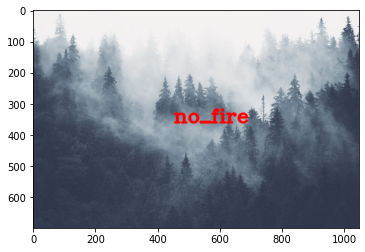

In [23]:
%matplotlib inline
image_path = "fog.jpg"
img = Image.open(image_path).convert('RGB')
x = tf.keras.utils.img_to_array(img,data_format='channels_last')
x = tf.keras.preprocessing.image.smart_resize(x, size=(224,224))
x = np.expand_dims(x, axis=0)
# predict
pred = model.predict(x,batch_size=1)[0]

for (pos,prob) in enumerate(pred):
    class_name = classes[pos]
    if (pos == np.argmax(pred)) :
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        font = cv2.FONT_HERSHEY_COMPLEX 
        textsize = cv2.getTextSize(class_name, font, 1, 2)[0]
        textX = (img.shape[1] - textsize[0]) / 2
        textY = (img.shape[0] + textsize[1]) / 2
        cv2.putText(img, class_name, (int(textX)-10, int(textY)), font, 2, (255,0,0), 6, cv2.LINE_AA)
        plt.imshow(img)
    print("Class Name : %s" % (class_name), "---", "Class Probability: %.2f%%" % (prob*100))
plt.show()